Lectura: Regresión no lineal usando perceptrones continuos --- 30:00 min
===

* Última modificación: Marzo 10, 2022

En este tutorial se describe la forma matemática y el algoritmo de entrenamiento de un perceptrón continuo.

Definición del problema
---

En este tutorial se aborda el problema de como construir un modelo de regresión lineal que usa un perceptrón continuo como modelo. En este caso, el modelo es:

$$
\sigma \left( w_0 + \sum_i w_i x_i \right) = y
$$

Note que en este caso, la componente de la entrada al perceptrón es un modelo de regresión lineal.

## Modelo matemático

Este problema será resuelto mediante un perceptrón continuo. En el perceptrón continuo, la función de activación es del tipo sigmoidea-logística en vez de la función de paso duro o conmutador bipolar. La especificación matemática de las funciones de activación y el diagrama representativo del modelo son presentadas a continuación. 

* Función tangente hiperbólica:

$$\tanh⁡(v) = \frac{\sinh⁡(v)}{\cosh⁡(v)} = \frac{\exp⁡(v)-\exp⁡(-v)}{\exp⁡(v)+\exp⁡(-v)}=\frac{1-\exp⁡(-2v)}{1+\exp⁡(2v)} $$

* Función sigmoidea:

$$\sigma (v) = \frac{1}{1+\exp(-v)}$$

De esta forma, la arquitectura del perceptrón continuo es la siguiente:


![assets/PerceptronRegresion-02.png](assets/PerceptronRegresion-02.png)

## Algoritmo de propagación hacia atrás del error (backpropagation)

Para estimar los valores de los pesos asociados a las conexiones se usa el algoritmo de backpropagation. Este es un algoritmo de gradiente descendente, por lo que resulta muy similar a las ecuaciones de aprendizaje usadas en los documentos anteriores. 

### Error instántaneo

En este caso, el error instántaneo se define como:

$$
\begin{split}
e & = d - y \\
  & = d - \sigma \left( w_0 + \sum_i w_i x_i \right) \\
  & = d - \sigma \left( \mathbf{w}^T \mathbf{x} \right)
\end{split}
$$

### Gradiente del error cuadrático instántaneo

El gradiente del error cuadrático respecto a los pesos es:

$$
\begin{split}
\frac{\partial}{\partial \mathbf{w}} e^2  
  & = 2  e \cdot \frac{\partial}{\partial \mathbf{w}} e \\
  \\
  & = 2 e \cdot \frac{\partial}{\partial \mathbf{w}} (d - y) \\
  \\
  & = - 2 e \cdot \frac{\partial}{\partial \mathbf{w}} y \\ 
  \\
  & = - 2 e \cdot \frac{\partial}{\partial \mathbf{w}} \sigma \left( w_0 + \sum_i w_i x_i \right) \\ 
\end{split}
$$

Haciendo:

$$
s = w_0 + \sum_i w_i x_i 
$$

Entonces,

$$
\begin{split}
\frac{\partial}{\partial \mathbf{w}} e^2  
  & = - 2 e \cdot \frac{\partial}{\partial \mathbf{w}} \sigma \left( w_0 + \sum_i w_i x_i \right) \\ 
  \\
  & = - 2 e \cdot \frac{\partial}{\partial \mathbf{w}} \sigma \left( s \right) \\ 
  \\
  & = - 2 e \cdot \sigma (s)'  \cdot \frac{\partial}{\partial \mathbf{w}} s \\   
  \\
  & = - 2 e  \cdot \sigma (s)'  \cdot \mathbf{x} \\   
\end{split}
$$

### Gradiente descendente

$$
\mathbf{w}_{k+1} = \mathbf{w}_k - \mu \frac{\partial}{\partial\mathbf{w}} \left[ e^2_k\right] =
\mathbf{w}_k + 2 \mu \cdot e_k \cdot \sigma' \left(s_k \right) \mathbf{x}_k
$$

### Derivadas de la función de activación

Las derivadas de la función de activación son las siguientes

* Para la función logistica-sigmoidea:

$$
\sigma (u) = \frac{1}{1+\exp(-u)}, \quad  \frac{\partial }{\partial u} \sigma(u)=\sigma(u)[1-\sigma(u)]
$$


* Para la función $\tanh$:

$$
\sigma(u) = \tanh(u) = \frac{\exp(u) - \exp(-u)}{\exp(u) + \exp(-u)}, \quad \frac{d}{du} \sigma(u) = 1 - \sigma(u)^2
$$

**Nota 1** --- Desde el punto de vista histórico, las dos ecuaciones anteriores son de singular importancia. Ello se debe a que en la década de los 80s y 90s, el poder de cómputo era muy limitado en comparación con el poder actual, y el uso de este tipo de funciones resulta computacionalmente eficiente en términos de tiempo. Ello se debe a que si se propagó la señal de entrada hacia adelante en la red neuronal para computar su salida y luego el error instantaneo, ya se conocen los valores de $\sigma(u)$, y por lo tanto, resulta muy simple el cálculo de la derivada para corregir los pesos usando técnicas de optimización basadas en el gradiente.

**Nota 2** --- También resulta muy simple el cálculo de la derivada cuando se usa la función reLU, definida como: ```0 if x <= 0 else x```, ya que la derivada será ```0 if x<= 0 else 1```.

### Ecuación de mejora

Para solucionar el problema se usará un perceptrón continuo que usa la función logística. La fórmula de correción de los pesos es la siguiente:

$$
\mathbf{w}_{k+1} = 
\mathbf{w}_k + 2 \mu \cdot e_k \cdot \sigma(u) \cdot[1 - \sigma(u)] \cdot  \mathbf{x}_k
$$

Nóte que esta es la misma ecuación usada en los tutoriales anteriores, excepto por la inclusión de la derivada de la función de activación (la función logística en la ecuación anterior).

## Implementación

El código es similar al de los libros ya estudiados, excepto por el cálculo de la derivada de la función sigmoidea.

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
class ContinuousPerceptron:
    def __init__(
        self,
        # ---------------------------------------------------------------------
        # tasa de aprendizaje usada en el metodo de gradiente descendente
        learning_rate=0.001,
        # ---------------------------------------------------------------------
        # número máximo de iteraciones sobre el set de datos
        max_epochs=100,
        # ---------------------------------------------------------------------
        # mezcla patrones para aprendizaje online
        shuffle=False,
        # ---------------------------------------------------------------------
        # ?batch o online
        batch=False,
        # ---------------------------------------------------------------------
        # Semilla del generador de aleatorios
        random_state=None,
        # ---------------------------------------------------------------------
        # ?Genera nuevos pesos aleatorios al realizar la optimización o
        # continua con los actuales
        warm_start=False,
    ):  #

        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.shuffle = shuffle
        self.batch = batch
        self.random_state = random_state
        self.warm_start = warm_start
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):

        #
        # Si los datos son listas, los convierte a NumPy
        #
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        if not isinstance(y, np.ndarray):
            d = np.array(y)
        else:
            d = y.copy()

        #
        # Semilla del generador de aleatorios
        #
        if self.random_state is not None:
            np.random.RandomState(self.random_state)

        #
        # ?genera nuevos pesos aleatorios o continua el entrenamiento con los
        # actuales
        #
        if self.coef_ is None or self.warm_start is False:
            self.coef_ = np.random.uniform(-1, 1, X.shape[1])

        if self.intercept_ is None or self.warm_start is False:
            self.intercept_ = np.random.uniform(-1, 1, 1)

        #
        # Proceso de entrenamiento
        #
        history = []

        if self.batch is True:
            #
            # Se computa el gradiente neto sobre todo el dataset y luego se
            # corrigen los pesos
            #
            for epoch in range(self.max_epochs):
                #
                # Note que estas son las ecuaciones de la parte de arriba
                #
                u = np.dot(X, self.coef_) + self.intercept_
                s = 1.0 / (1.0 + np.exp(-u))
                e = d - s
                self.coef_ += (
                    2 * self.learning_rate * np.sum((X.T * e * s * (1.0 - s)).T, axis=0)
                )
                self.intercept_ += (
                    2 * self.learning_rate * np.sum((e * s * (1.0 - s)).T, axis=0)
                )
                history.append(sum([a**2 for a in e]))
        else:

            for epoch in range(self.max_epochs):

                if self.shuffle is True:
                    #
                    # Se mezcla aleatoriamente el conjunto de entrenamiento
                    #
                    n = list(range(X.shape[0]))
                    np.random.shuffle(n)
                    X = X[n, :]
                    d = d[n]

                for i in range(X.shape[0]):
                    #
                    # Para cada patrón se calcula el gradiente instantaneo y se
                    # corrigen los pesos
                    #
                    u = np.dot(X[i, :], self.coef_) + self.intercept_
                    s = 1.0 / (1.0 + np.exp(-u))
                    e = (d[i] - s)[0]
                    self.coef_ += 2 * self.learning_rate * e * s * (1 - s) * X[i, :]
                    self.intercept_ += 2 * self.learning_rate * e * s * (1 - s)
                    history.append(e**2)

        return history

    def predict(self, X):
        #
        # Pronóstico para un nuevo conjunto X
        #
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        u = np.dot(X, self.coef_) + self.intercept_
        return 1.0 / (1.0 + np.exp(-u))

## Regresión no lineal usando perceptrones continuos

### Dataset

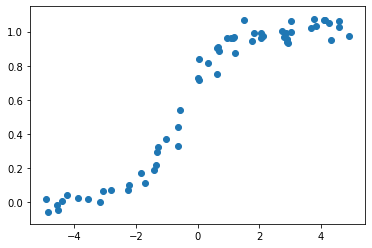

In [3]:
#
# Generación de una muestra artificial
#
n_samples = 60
np.random.seed(1234)
X = np.random.uniform(-5, 5, n_samples)
d = 1.0 / (1 + np.exp(-(1.0 + 1.53 * X))) + 0.05 * np.random.normal(size=n_samples)
X = np.array([[e] for e in X])
plt.scatter(X, d);

### Especificación del modelo

In [4]:
continuousPerceptron = ContinuousPerceptron(
    learning_rate=0.05,
    max_epochs=20,
    shuffle=True,
    random_state=12345,
    batch=False,
)

### Entrenamiento

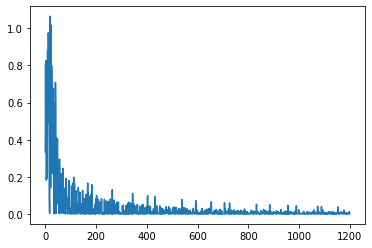

In [5]:
history = continuousPerceptron.fit(X, d)
plt.plot(history);

### Pronóstico

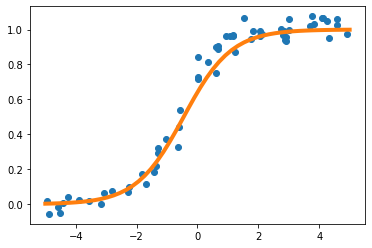

In [6]:
plt.plot(X, d, "o")
X_pred = np.linspace(start=-5, stop=5, num=50)
X_pred = [[x] for x in X_pred]
y = continuousPerceptron.predict(X_pred) # <--- aca se realiza el pronostico
plt.plot(X_pred, y, "-", linewidth=4);